(-5.0, 5.0, 0.0, 1.02)

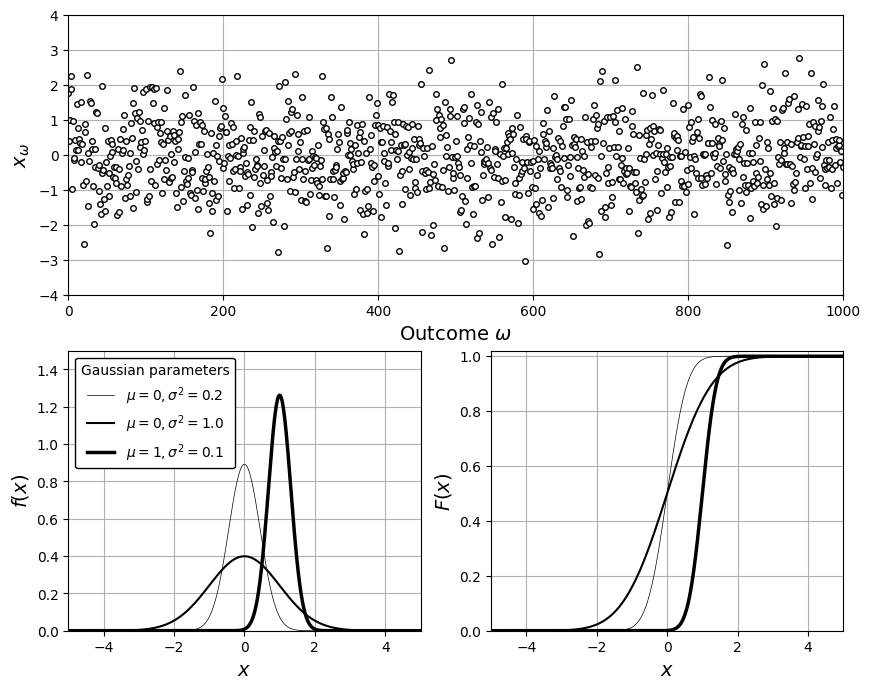

In [2]:
# Victor Z, J E Umaña
# UW-Madison, 2024
# compare gaussians RVs

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Clear previous plots
plt.close('all')

# Values for mu and sigma
mu = [0, 0, 1]
sigma = [np.sqrt(1/5), np.sqrt(1), np.sqrt(1/10)]
w = [0.5, 1.5, 2.5]
x = np.linspace(-5, 5, 1000)

# Generate realizations
S = 1000
np.random.seed(0)
X = np.random.normal(0, 1, S)

# Plot
plt.figure(figsize=(10,8))

plt.subplot(2, 2, (1, 2))
plt.plot(X, 'ko', markerfacecolor='w', markersize=4)
plt.xlabel('Outcome $\omega$', fontsize=14)
plt.ylabel('$x_\omega$', fontsize=14)
plt.axis([0, 1000, -4, 4])
plt.grid(True)

plt.subplot(2, 2, 3)
for k in range(len(mu)):
    plt.plot(x, norm.pdf(x, mu[k], sigma[k]), 'k-', linewidth=w[k], label=f'$\mu={mu[k]},\sigma^2={np.round(sigma[k]**2, 3)}$')
plt.grid(True)
lgd = plt.legend(loc='upper left', fontsize=10, framealpha=1, edgecolor='k')
lgd.set_title('Gaussian parameters', prop={'size': 10})
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axis([-5, 5, 0, 1.5])

plt.subplot(2, 2, 4)
for k in range(len(mu)):
    plt.plot(x, norm.cdf(x, mu[k], sigma[k]), 'k-', linewidth=w[k])
plt.grid(True)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)
plt.axis([-5, 5, 0, 1.02])

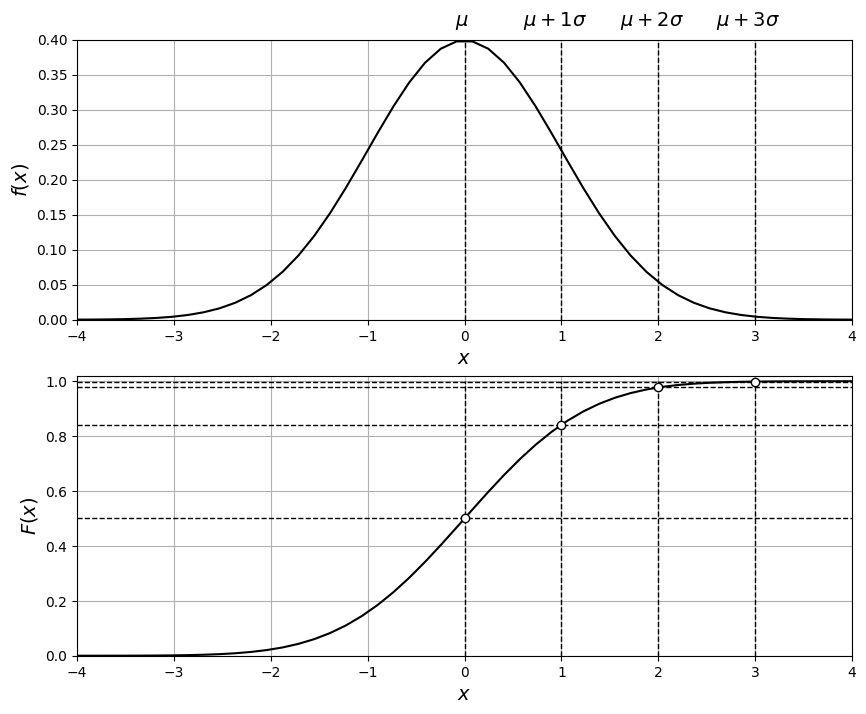

In [3]:

# Compute critical values for standard normal
plt.figure(figsize=(10,8))
mu = 0
sig = 1
x = np.linspace(mu - 4 * sig, mu + 4 * sig)
n = len(x)

plt.subplot(2, 1, 1)
plt.plot(x, norm.pdf(x, mu, sig), 'k', linewidth=1.5)
plt.grid(True)
for k in range(4):
    q = mu + k * sig
    plt.plot(np.full(n, q), np.linspace(0, 0.4), 'k--', lw=1)
plt.text(-0.1, 0.42, '$\mu$', fontsize=14)
plt.text(0.6, 0.42, '$\mu+1 \sigma$', fontsize=14)
plt.text(1.6, 0.42, '$\mu+2\sigma$', fontsize=14)
plt.text(2.6, 0.42, '$\mu+3\sigma$', fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.axis([-4, 4, 0, 0.4])

plt.subplot(2, 1, 2)
plt.plot(x, norm.cdf(x, mu, sig), 'k', linewidth=1.5)
plt.grid(True, zorder=1)
for k in range(4):
    q = mu + k * sig
    plt.plot(x, norm.cdf(q, mu, sig) * np.ones(n), 'k--', lw=1, zorder=2)
    plt.plot(np.full(n, q), np.linspace(0, 1), 'k--', lw =1, zorder=2)
    plt.scatter(q, norm.cdf(q, mu, sig), marker='o', facecolors='w', edgecolors='black', zorder=3)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)
plt.axis([-4, 4, 0, 1.02])
plt.show()